# İbrahim Erekmen 1806102040

## Makine Öğrenmesi Ders Projesi: Müzik Türlerinin Sınıflandırılması

###Geleneksel Makine Öğrenmesi Yöntemlerinin Kullanılması

####23.01.2022

Önemli Kütüphanelerin içe aktarılması

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Veri setinin okunması ve ilk 5 satırının yazdırılması

In [ ]:
url = 'https://raw.githubusercontent.com/Ibrah-erekmen/Machine-Learning/main/features_30_sec.csv'
df = pd.read_csv(url)
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


Veride eksik değer kontrolü

In [ ]:
df.isnull().any()

filename                   False
length                     False
chroma_stft_mean           False
chroma_stft_var            False
rms_mean                   False
rms_var                    False
spectral_centroid_mean     False
spectral_centroid_var      False
spectral_bandwidth_mean    False
spectral_bandwidth_var     False
rolloff_mean               False
rolloff_var                False
zero_crossing_rate_mean    False
zero_crossing_rate_var     False
harmony_mean               False
harmony_var                False
perceptr_mean              False
perceptr_var               False
tempo                      False
mfcc1_mean                 False
mfcc1_var                  False
mfcc2_mean                 False
mfcc2_var                  False
mfcc3_mean                 False
mfcc3_var                  False
mfcc4_mean                 False
mfcc4_var                  False
mfcc5_mean                 False
mfcc5_var                  False
mfcc6_mean                 False
mfcc6_var 

Eğitim için özellik ve etiket değerlerinin ayrılması 

In [ ]:
X=df[df.columns[2:-1]]
y=df['label']

Özellik değerleri

In [ ]:
X

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035
1,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282
2,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025
3,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339
4,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,8860

Sınıf etiketleri

In [ ]:
y

0      blues
1      blues
2      blues
3      blues
4      blues
       ...  
995     rock
996     rock
997     rock
998     rock
999     rock
Name: label, Length: 1000, dtype: object

Sınıf Türleri

In [ ]:
y.value_counts()

reggae       100
pop          100
classical    100
country      100
jazz         100
disco        100
hiphop       100
rock         100
metal        100
blues        100
Name: label, dtype: int64

Veri işleme adımı: Özellik Değerlerlerinin 0,1 aralığına çekilmesi ve sınıf etiketlerinin tam sayı değerlere eşlenmesi 

In [ ]:
cols = X.columns
min_max_scaler =MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)
le=LabelEncoder()
y=le.fit_transform(y)

Verinin eğitim ve test verisi olarak ayrılması

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Destek vektör makinesi Sınıflandırıcısının Eğitilmesi ve Doğruluk Sonuçlarının elde edilmesi

In [ ]:
svm=SVC()
svm.fit(X_train,y_train)
ypred_svm=svm.predict(X_test)
acc_svm=accuracy_score(y_test,ypred_svm)
acc_svm

0.675

K En Yakın Komşuluk Sınıflandırıcısının Eğitilmesi ve Doğruluk Sonuçlarının elde edilmesi

In [ ]:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
ypred_knn=KNN.predict(X_test)
acc_knn=accuracy_score(y_test,ypred_knn)
acc_knn

0.65

Lojistik Regresyon Sınıflandırıcısının Eğitilmesi ve Doğruluk Sonuçlarının elde edilmesi

In [ ]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
ypred_lr=LR.predict(X_test)
acc_lr=accuracy_score(y_test,ypred_lr)
acc_lr

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.675

Rastgele Ormanlar Sınıflandırıcısının Eğitilmesi ve Doğruluk Sonuçlarının elde edilmesi

In [ ]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
ypred_rf=RF.predict(X_test)
acc_rf=accuracy_score(y_test,ypred_rf)
acc_rf

0.7

Karar Ağaçları Sınıflandırıcısının Eğitilmesi ve Doğruluk Sonuçlarının elde edilmesi

In [ ]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
ypred_dt=DT.predict(X_test)
acc_dt=accuracy_score(y_test,ypred_dt)
acc_dt

0.555

Karmaşıklık (Confusion) Matrislerinin oluşturulması

In [ ]:
confusion_matr_rf = confusion_matrix(y_test, ypred_rf)
confusion_matr_lr = confusion_matrix(y_test, ypred_lr)
confusion_matr_svm = confusion_matrix(y_test, ypred_svm)
confusion_matr_knn = confusion_matrix(y_test, ypred_knn)
confusion_matr_dt = confusion_matrix(y_test, ypred_dt)

Rastgele ormanlar Sınıflandırıcısının Karmaşıklık Matrisi

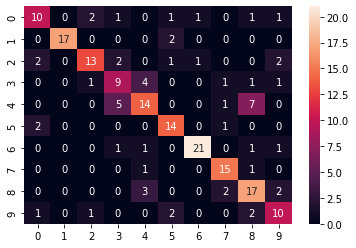

In [ ]:
sns.heatmap(confusion_matr_rf,annot=True)

Lojistik Regresyon Sınıflandırıcısının Karmaşıklık Matrisi

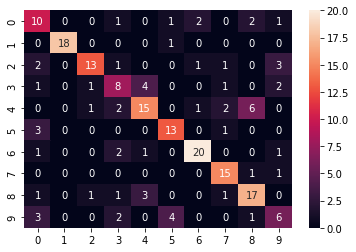

In [ ]:
sns.heatmap(confusion_matr_lr,annot=True)


Destek Vektör Makinaları Sınıflandırıcısının Karmaşıklık Matrisi

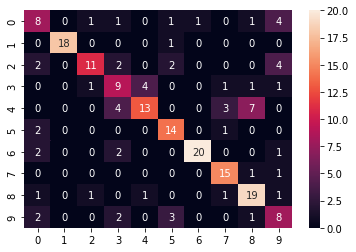

In [ ]:
sns.heatmap(confusion_matr_svm,annot=True)


K En yakın Komşuluk Sınıflandırıcısının Karmaşıklık Matrisi

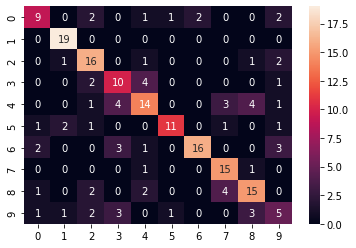

In [ ]:
sns.heatmap(confusion_matr_knn,annot=True)

Karar Ağaçları Sınıflandırıcısının Karmaşıklık Matrisi

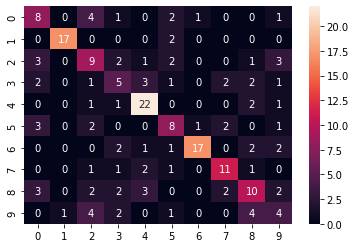

In [ ]:
sns.heatmap(confusion_matr_dt,annot=True)

Sınıflandırıcların Doğruluk Değerlerinin Tablolaştırılması

In [ ]:
classifier=['SVM','KNN','RandomForest','Logistic Regression','Decision Tree']
accuracies=[acc_svm,acc_knn,acc_rf,acc_lr,acc_dt]
accs = pd.DataFrame(classifier,columns=['ML Used'])
accs['Accuracy']=pd.DataFrame(accuracies)
accs

,ML Used,Accuracy
0,SVM,0.675
1,KNN,0.650
2,RandomForest,0.700
3,Logistic Regression,0.675
4,Decision Tree,0.555


Sınıflandırıcların Doğruluk Değerlerinin Görselleştirilmesi

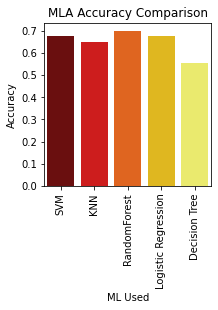

In [ ]:
plt.subplots(figsize=(3,3))
sns.barplot(x=accs['ML Used'], y=accs['Accuracy'],palette='hot')
plt.xticks(rotation=90)
plt.title('ML Accuracy Comparison')
plt.show()